Importing each sheet using read_excel() with sheet_name as parameter to specify which sheet needs to be loaded

In [ ]:
,header=None,names=['customer_id','fname','lname','gender','3y_bike_purchases','DOB','JT','Category','wealth_segement','D_Indicator','default','owns_car','tencure'],skip_rows=range(0,3),

In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
%matplotlib inline
data_file0 = pd.read_excel('/Users/keerthiseetha/villanova/anaconda3/HW02/Data/hist_painel_covidbr_07jun2020_V2.xlsx', sheet_name=0)
data_file2 = pd.read_excel('/Users/keerthiseetha/villanova/anaconda3/HW02/Data/hist_painel_covidbr_07jun2020_V2.xlsx', sheet_name=2)
data_file3 = pd.read_excel('/Users/keerthiseetha/villanova/anaconda3/HW02/Data/hist_painel_covidbr_07jun2020_V2.xlsx', sheet_name=3,header=None,names=["CommonTwoLetterAbbreviation","State","CapitolCity","Region","Size","Population2007","UrbanRural","NumberofMunicipalDistricts","PerCapitaGNPinReais","LifeExpectancy"],skiprows = range(0,4))

data_file2.columns = data_file2.columns.str.replace('?', '')

Filtering the data in data_file2 [Temperature_by_state] , to use values with only is_capitol value as Y,y

In [5]:
capital_city_temp=data_file2[data_file2.IS_CAPITOL.str.lower().eq('y')]
capital_city_temp.shape

(27, 19)

In [11]:
merged_temp=capital_city_temp.merge(data_file0,left_on=['State-Abbr','City'],right_on=['State','Municipality'])

Checking the merged data by printing it.

In [12]:
print(merged_temp.dtypes)

State-Abbr                object
State_x                   object
City                      object
IS_CAPITOL                object
ANNUAL                   float64
JAN                      float64
FEB                      float64
MAR                      float64
APR                      float64
MAY                      float64
JUN                      float64
JUL                      float64
AUG                      float64
SEP                      float64
OCT                      float64
NOV                      float64
DEC                      float64
YEARS                      int64
# CITIES                   int64
Region                    object
State_y                   object
Municipality              object
State-code                 int64
Municipality-code        float64
Health-region-code       float64
Health-region-name        object
Date                      object
Week #                     int64
Population as of 2019     object
Accumulated cases          int64
New cases 

Removing unnecessary columns

In [13]:
merged_temp=merged_temp.drop(['Health-region-name','Health-region-code','Municipality-code','State-code','YEARS ','Accumulated deaths','New deaths','New Recoveries','New followups (?)'],1)

In [14]:
merged_temp.head()

,State-Abbr,State_x,City,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,APR,MAY,...,DEC,# CITIES,Region,State_y,Municipality,Date,Week #,Population as of 2019,Accumulated cases,New cases
0,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,77.7,1,Norte,AC,Rio Branco,2020-03-28,13,407319,25,0
1,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,77.7,1,Norte,AC,Rio Branco,2020-03-29,14,407319,31,6
2,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,77.7,1,Norte,AC,Rio Branco,2020-03-30,14,407319,35,4
3,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,77.7,1,Norte,AC,Rio Branco,2020-03-31,14,407319,34,0
4,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,77.7,1,Norte,AC,Rio Branco,2020-04-01,14,407319,34,0


In [15]:
corr = merged_temp.corr()
corr.style.background_gradient(cmap='coolwarm')

/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,# CITIES,Week #,Accumulated cases,New cases
ANNUAL,1.000000,0.874000,0.835374,0.923426,0.986109,0.988521,0.979064,0.981731,0.970280,0.959859,0.977453,0.990855,0.957671,nan,0.000000,-0.070853,-0.064746
JAN,0.874000,1.000000,0.989461,0.974920,0.896260,0.843021,0.803790,0.794000,0.741341,0.720838,0.779484,0.863096,0.956950,nan,-0.000000,0.030587,0.025719
FEB,0.835374,0.989461,1.000000,0.971247,0.869182,0.797982,0.751439,0.738178,0.686884,0.671431,0.731793,0.816752,0.927046,nan,0.000000,0.031132,0.027664
MAR,0.923426,0.974920,0.971247,1.000000,0.955366,0.902462,0.864566,0.853684,0.816854,0.803985,0.847004,0.902563,0.955803,nan,-0.000000,-0.016627,-0.013002
APR,0.986109,0.896260,0.869182,0.955366,1.000000,0.985352,0.966254,0.958574,0.939787,0.927896,0.947559,0.966285,0.948203,nan,0.000000,-0.068873,-0.059555
MAY,0.988521,0.843021,0.797982,0.902462,0.985352,1.000000,0.993950,0.988872,0.969433,0.951146,0.962815,0.974669,0.931521,nan,0.000000,-0.065111,-0.055970
JUN,0.979064,0.803790,0.751439,0.864566,0.966254,0.993950,1.000000,0.995369,0.977946,0.952768,0.958449,0.966806,0.908820,nan,0.000000,-0.068728,-0.059008
JUL,0.981731,0.794000,0.738178,0.853684,0.958574,0.988872,0.995369,1.000000,0.988090,0.966678,0.973579,0.976296,0.908647,nan,0.000000,-0.072713,-0.064154
AUG,0.970280,0.741341,0.686884,0.816854,0.939787,0.969433,0.977946,0.988090,1.000000,0.990659,0.984907,0.964743,0.871022,nan,-0.000000,-0.101759,-0.091080
SEP,0.959859,0.720838,0.671431,0.803985,0.927896,0.951146,0.952768,0.966678,0.990659,1.000000,0.991121,0.958532,0.857356,nan,-0.000000,-0.125891,-0.114229


Finding the start date of the cases using min() and converting it to date format

In [16]:
date_start=min(merged_temp.Date)
date_start=pd.to_datetime(date_start)
print(date_start)

2020-03-28 00:00:00


Converting the Date column in merged_temp from string to date format

In [17]:
merged_temp.Date = pd.to_datetime(merged_temp.Date)

Finding the number of days since the beginning and storing in days_from_case

In [18]:
days_from_case=[]
days_from_case = (merged_temp.Date - date_start).dt.days 
print(days_from_case)

0        0
1        1
2        2
3        3
4        4
        ..
1939    67
1940    68
1941    69
1942    70
1943    71
Name: Date, Length: 1944, dtype: int64


Adding days_from_case to merged_temp frame as 'DaysCount'

In [19]:
merged_temp['DaysCount']=days_from_case

In [20]:
merged_temp.head()

,State-Abbr,State_x,City,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,APR,MAY,...,# CITIES,Region,State_y,Municipality,Date,Week #,Population as of 2019,Accumulated cases,New cases,DaysCount
0,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,1,Norte,AC,Rio Branco,2020-03-28,13,407319,25,0,0
1,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,1,Norte,AC,Rio Branco,2020-03-29,14,407319,31,6,1
2,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,1,Norte,AC,Rio Branco,2020-03-30,14,407319,35,4,2
3,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,1,Norte,AC,Rio Branco,2020-03-31,14,407319,34,0,3
4,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,1,Norte,AC,Rio Branco,2020-04-01,14,407319,34,0,4


The column names of merged_temp have no-break-space hex codes in them(\xa0).Cleaning the header names by stripping off them

In [21]:
col_name=merged_temp.columns.values
new_col=[i.strip() for i in col_name]
merged_temp.columns=new_col
print(merged_temp.columns)

Index(['State-Abbr', 'State_x', 'City', 'IS_CAPITOL', 'ANNUAL', 'JAN', 'FEB',
       'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
       '# CITIES', 'Region', 'State_y', 'Municipality', 'Date', 'Week #',
       'Population as of 2019', 'Accumulated cases', 'New cases', 'DaysCount'],
      dtype='object')


ANNUAL vs New cases

In [23]:
X =merged_temp['ANNUAL']
y=merged_temp['New cases']

X=np.array(X)
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


Linear Regression

(1458,)
(486,)
(1458,)
(486,)


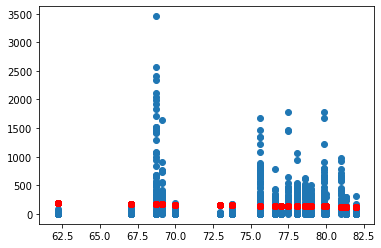

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X_train[:,np.newaxis],y_train)
lyfit=model.predict(X_test[:,np.newaxis])
print(X_train.shape)
print(lyfit.shape)
print(y_train.shape)
print(X_test.shape)
plt.scatter(X_train,y_train)
plt.scatter(X_test,lyfit,color='red')

In [25]:
new_cases=merged_temp['New cases']
new_cases_log=np.log(new_cases)
new_cases_log[new_cases_log==-np.inf]=0
merged_temp['New_cases_log']=new_cases_log

/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Linear Regression

Polynomial Regression

array([ 0.08902147, -0.00053121])

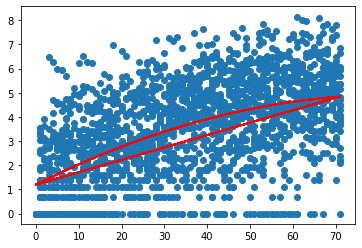

In [82]:
from sklearn.preprocessing import PolynomialFeatures
def poly_regress(degree,Xit,yit):
    poly = PolynomialFeatures(degree, include_bias=False)
    fit_xit = poly.fit_transform(Xit[:, np.newaxis])
    xitmodel = LinearRegression(fit_intercept=True)
    xitmodel.fit(fit_xit,yit)
    fit_yit = xitmodel.predict(fit_xit)
    plt.scatter(Xit,yit)
    plt.plot(Xit,fit_yit,color="red")
    return xitmodel.coef_
poly_regress(2, Xit, yit)

Multi Variate Linear Regression taking ANNUAL and DaysCount as X and New_cases as y

Defining X & Y
Splitting data

In [28]:
from sklearn import linear_model
X_new=merged_temp[['ANNUAL','DaysCount']]
Y_new=merged_temp['New_cases_log']
X_new_train,X_new_test,Y_new_train,Y_new_test=train_test_split(X_new,Y_new,random_state=0)

In [29]:
trn_model=linear_model.LinearRegression()
trn_model.fit(X_new_train,Y_new_train)

print('Intercept',trn_model.intercept_)
print('Coefficients',trn_model.coef_)

Y_predict=trn_model.predict(X_new_test)

Intercept -2.1388322895680885
Coefficients [0.05100771 0.04929024]


New_cases_log= -1.67814 + 0.02356771(ANNUAL) + 0.00493264(DaysCount)

Merging the data_file3 with merged_temp to obtain the data regarding population

In [31]:
new_merged_temp=pd.merge(merged_temp,data_file3,left_on='City',right_on='CapitolCity')
new_merged_temp.columns.values

print(new_merged_temp)

     State-Abbr    State_x        City IS_CAPITOL  ANNUAL   JAN   FEB   MAR  \
0            AC       Acre  Rio Branco          Y    76.6  77.5  77.4  77.7   
1            AC       Acre  Rio Branco          Y    76.6  77.5  77.4  77.7   
2            AC       Acre  Rio Branco          Y    76.6  77.5  77.4  77.7   
3            AC       Acre  Rio Branco          Y    76.6  77.5  77.4  77.7   
4            AC       Acre  Rio Branco          Y    76.6  77.5  77.4  77.7   
...         ...        ...         ...        ...     ...   ...   ...   ...   
1867         TO  TOCANTINS      Palmas          Y    77.0  77.5  77.4  77.9   
1868         TO  TOCANTINS      Palmas          Y    77.0  77.5  77.4  77.9   
1869         TO  TOCANTINS      Palmas          Y    77.0  77.5  77.4  77.9   
1870         TO  TOCANTINS      Palmas          Y    77.0  77.5  77.4  77.9   
1871         TO  TOCANTINS      Palmas          Y    77.0  77.5  77.4  77.9   

       APR   MAY  ...  CommonTwoLetterAbbreviation 

In [32]:
new_merged_temp.head()

,State-Abbr,State_x,City,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,APR,MAY,...,CommonTwoLetterAbbreviation,State,CapitolCity,Region_y,Size,Population2007,UrbanRural,NumberofMunicipalDistricts,PerCapitaGNPinReais,LifeExpectancy
0,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,AC,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1
1,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,AC,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1
2,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,AC,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1
3,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,AC,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1
4,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,AC,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1


Finding the density of population and storing it in a seperate column

In [33]:
dens=new_merged_temp[['Population2007','Size']]

In [34]:
dens['Result'] = dens['Population2007']/dens['Size']
new_merged_temp['DensityPopulation']=dens['Result']
new_merged_temp.head()

/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State-Abbr,State_x,City,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,APR,MAY,...,State,CapitolCity,Region_y,Size,Population2007,UrbanRural,NumberofMunicipalDistricts,PerCapitaGNPinReais,LifeExpectancy,DensityPopulation
0,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1,4.35179
1,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1,4.35179
2,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1,4.35179
3,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1,4.35179
4,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,...,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1,4.35179


In [39]:
acc_cases=new_merged_temp['Accumulated cases']
Acc_cases_log=np.log(acc_cases)
Acc_cases_log[Acc_cases_log==-np.inf]=0
new_merged_temp['Acc_cases_log']=Acc_cases_log

Finding the earliest date of Covid cases for every capitol city by grouping State and Municipality

In [79]:
state_city_groupby=new_merged_temp.groupby(['State-Abbr','Municipality']).agg({'Date':['min']})
state_city_groupby.columns=['MinDate']
print(state_city_groupby)

                             MinDate
State-Abbr Municipality             
AC         Rio Branco     2020-03-28
AL         Maceió         2020-03-28
AM         Manaus         2020-03-28
AP         Macapá         2020-03-28
BA         Salvador       2020-03-28
CE         Fortaleza      2020-03-28
DF         Brasília       2020-03-28
ES         Vitória        2020-03-28
GO         Goiânia        2020-03-28
MA         São Luís       2020-03-28
MG         Belo Horizonte 2020-03-28
MS         Campo Grande   2020-03-28
MT         Cuiabá         2020-03-28
PA         Belém          2020-03-28
PB         João Pessoa    2020-03-28
PE         Recife         2020-03-28
PI         Teresina       2020-03-28
PR         Curitiba       2020-03-28
RJ         Rio de Janeiro 2020-03-28
RN         Natal          2020-03-28
RO         Porto Velho    2020-03-28
RR         Boa Vista      2020-03-28
RS         Porto Alegre   2020-03-28
SC         Florianópolis  2020-03-28
SP         São Paulo      2020-03-28
T

In [80]:
df_new=pd.merge(state_city_groupby,new_merged_temp,left_on=['State-Abbr','Municipality'],right_on=['State-Abbr','Municipality'])

Finding the Days count for every city in every state

In [240]:
df_new['NDays']=(df_new['Date']-df_new['MinDate']).dt.days

Adding polynomial Coefficients

In [104]:
for i in range(2,4):
    NDays_2=f'NDays_{i}'
    df_new[NDays_2]=df_new['NDays']**i
df_new.head()

,State-Abbr,Municipality,MinDate,State_x,City,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,...,Population2007,UrbanRural,NumberofMunicipalDistricts,PerCapitaGNPinReais,LifeExpectancy,DensityPopulation,Acc_cases_log,NDays,NDays_2,NDays_3
0,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,24,"R$5,413",71.1,4.35179,3.218876,0,0,0
1,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,24,"R$5,413",71.1,4.35179,3.433987,1,1,1
2,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,24,"R$5,413",71.1,4.35179,3.555348,2,4,8
3,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,24,"R$5,413",71.1,4.35179,3.526361,3,9,27
4,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,24,"R$5,413",71.1,4.35179,3.526361,4,16,64


In [105]:
df_area=pd.read_excel('/Users/keerthiseetha/villanova/anaconda3/HW02/Data/CityArea.xls')

In [106]:
final_df=pd.merge(df_new,df_area,left_on='Municipality',right_on='City')

In [107]:
final_df.head()

,State-Abbr,Municipality,MinDate,State_x,City_x,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,...,NumberofMunicipalDistricts,PerCapitaGNPinReais,LifeExpectancy,DensityPopulation,Acc_cases_log,NDays,NDays_2,NDays_3,City_y,Area(sq.km)
0,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,24,"R$5,413",71.1,4.35179,3.218876,0,0,0,Rio Branco,8835.0
1,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,24,"R$5,413",71.1,4.35179,3.433987,1,1,1,Rio Branco,8835.0
2,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,24,"R$5,413",71.1,4.35179,3.555348,2,4,8,Rio Branco,8835.0
3,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,24,"R$5,413",71.1,4.35179,3.526361,3,9,27,Rio Branco,8835.0
4,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,24,"R$5,413",71.1,4.35179,3.526361,4,16,64,Rio Branco,8835.0


In [109]:
final_df=final_df.drop(['LifeExpectancy','NumberofMunicipalDistricts','PerCapitaGNPinReais'],1)

In [110]:
final_df.head()

,State-Abbr,Municipality,MinDate,State_x,City_x,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,...,Region_y,Size,Population2007,UrbanRural,Acc_cases_log,NDays,NDays_2,NDays_3,City_y,Area(sq.km)
0,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,North,152581,664000,69.6/30.4,3.218876,0,0,0,Rio Branco,8835.0
1,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,North,152581,664000,69.6/30.4,3.433987,1,1,1,Rio Branco,8835.0
2,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,North,152581,664000,69.6/30.4,3.555348,2,4,8,Rio Branco,8835.0
3,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,North,152581,664000,69.6/30.4,3.526361,3,9,27,Rio Branco,8835.0
4,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,North,152581,664000,69.6/30.4,3.526361,4,16,64,Rio Branco,8835.0


In [117]:
popdns=final_df[['Population as of 2019','Area(sq.km)']]
popdns['Result'] = popdns['Population as of 2019']/popdns['Area(sq.km)']
final_df['DensityPopulation']=popdns['Result']
final_df.head()

/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State-Abbr,Municipality,MinDate,State_x,City_x,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,...,Size,Population2007,UrbanRural,Acc_cases_log,NDays,NDays_2,NDays_3,City_y,Area(sq.km),DensityPopulation
0,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,152581,664000,69.6/30.4,3.218876,0,0,0,Rio Branco,8835.0,46.1029
1,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,152581,664000,69.6/30.4,3.433987,1,1,1,Rio Branco,8835.0,46.1029
2,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,152581,664000,69.6/30.4,3.555348,2,4,8,Rio Branco,8835.0,46.1029
3,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,152581,664000,69.6/30.4,3.526361,3,9,27,Rio Branco,8835.0,46.1029
4,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,152581,664000,69.6/30.4,3.526361,4,16,64,Rio Branco,8835.0,46.1029


Adding polynomail coefficient for density of population

In [121]:
for i in range(2,3):
    DensPop_2=f'DensityPopulation_{i}'
    final_df[DensPop_2]=final_df['DensityPopulation']**i
final_df.head()

,State-Abbr,Municipality,MinDate,State_x,City_x,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,...,Population2007,UrbanRural,Acc_cases_log,NDays,NDays_2,NDays_3,City_y,Area(sq.km),DensityPopulation,DensityPopulation_2
0,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,3.218876,0,0,0,Rio Branco,8835.0,46.1029,2125.48
1,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,3.433987,1,1,1,Rio Branco,8835.0,46.1029,2125.48
2,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,3.555348,2,4,8,Rio Branco,8835.0,46.1029,2125.48
3,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,3.526361,3,9,27,Rio Branco,8835.0,46.1029,2125.48
4,AC,Rio Branco,2020-03-28,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,...,664000,69.6/30.4,3.526361,4,16,64,Rio Branco,8835.0,46.1029,2125.48


Linear Regression Implementation 

Defining X and Y---
Split X & Y --
Train the model --
Prediction

In [230]:
X=final_df[['NDays','NDays_2','NDays_3','ANNUAL','DensityPopulation_2','DensityPopulation','Population as of 2019']]
Y=final_df['Acc_cases_log']

Final_X_train,Final_X_test,Final_Y_train,Final_Y_test=train_test_split(X,Y,random_state=0)

final_model=linear_model.LinearRegression()
final_model.fit(Final_X_train,Final_Y_train)

final_Y_predict=final_model.predict(Final_X_test)

print(final_model.intercept_)
pd.DataFrame({'Variable': X.columns, 'Estimate': final_model.coef_})


-4.507115730368234


,Variable,Estimate
0,NDays,1.399690e-01
1,NDays_2,-1.555202e-03
2,NDays_3,8.381277e-06
3,ANNUAL,8.919455e-02
4,DensityPopulation_2,-1.121344e-08
5,DensityPopulation,2.502633e-04
6,Population as of 2019,3.370612e-07


Ridge Regression

In [167]:
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha' :[1e-20,1e-15,1e-10,1e-5,1,2,5,10,15,20]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(Final_X_train,Final_Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-20, 1e-15, 1e-10, 1e-05, 1, 2, 5, 10, 15,
                                   20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [168]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-0.7126978326500962


Lasso Regression

In [170]:
from sklearn.model_selection import GridSearchCV

las=Lasso()
parameters={'alpha' :[1e-20,1e-15,1e-10,1e-5,1,2,5,10,15,20]}
las_regressor=GridSearchCV(las,parameters,scoring='neg_mean_squared_error',cv=5)

las_regressor.fit(Final_X_train,Final_Y_train)


/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.3983183966923, tolerance: 0.42136755502319684
  positive)
/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385.7212399092415, tolerance: 0.4218387141010564
  positive)
/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369.5542082978495, tolerance: 0.40968915405642875
  positive)
/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-package

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-20, 1e-15, 1e-10, 1e-05, 1, 2, 5, 10, 15,
                                   20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [179]:
print(las_regressor.best_params_)
print(las_regressor.best_score_)

{'alpha': 1e-15}
Lasso Score : -0.7127090737738866


In [ ]:
Though the difference seems very small,lasso is the better model.

In [172]:
ols_mse = mean_squared_error(Final_Y_test, final_Y_predict)

In [173]:
ols_r_squared = r2_score(Final_Y_test, final_Y_predict)

In [174]:
print("OLS R-squared:", round(ols_r_squared, 4))
print("OLS MSE:", round(ols_mse, 4))

OLS R-squared: 0.8367
OLS MSE: 0.6453


In [181]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(Final_X_train, Final_Y_train)
ridge_df = pd.DataFrame({'variable': X.columns, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

alphas = np.arange(0, 200, 1)

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(Final_X_train, Final_Y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(Final_X_train))
    ridge_test_pred.append(ridge_reg.predict(Final_X_test))
    
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(mapper=None, axis=1).reset_index()



In [184]:
pd.DataFrame({'variable': X.columns, 'estimate': ridge_reg.coef_})

,variable,estimate
0,NDays,1.355429e-01
1,NDays_2,-1.415600e-03
2,NDays_3,7.165584e-06
3,ANNUAL,8.854260e-02
4,DensityPopulation_2,-1.102152e-08
5,DensityPopulation,2.486890e-04
6,Population as of 2019,3.366075e-07


In [189]:
# initialize
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(Final_X_train, Final_Y_train)
lasso_df = pd.DataFrame({'variable': X.columns, 'estimate': lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

alphas = np.arange(0.01, 50, 1)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(Final_X_train, Final_Y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    
    # prediction
    lasso_train_pred.append(lasso_reg.predict(Final_X_train))
    lasso_test_pred.append(lasso_reg.predict(Final_X_test))


/Users/keerthiseetha/villanova/anaconda3/envs/csc9010/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479.61750418557193, tolerance: 0.5237556176717204
  positive)


In [190]:
pd.DataFrame({'variable': X.columns, 'estimate': lasso_reg.coef_})

,variable,estimate
0,NDays,0.000000e+00
1,NDays_2,2.070571e-03
2,NDays_3,-1.865416e-05
3,ANNUAL,0.000000e+00
4,DensityPopulation_2,1.829197e-08
5,DensityPopulation,6.979628e-07
6,Population as of 2019,2.835201e-07


In [201]:
# R-squared of training set
ridge_r_squared_train = [r2_score(Final_Y_train, p) for p in ridge_train_pred]
lasso_r_squared_train = [r2_score(Final_Y_train, p) for p in lasso_train_pred]

# R-squared of test set
ridge_r_squared_test = [r2_score(Final_Y_test, p) for p in ridge_test_pred]
lasso_r_squared_test = [r2_score(Final_Y_test, p) for p in lasso_test_pred]

# MSE of training set
ridge_mse_train = [mean_squared_error(Final_Y_train, p) for p in ridge_train_pred]
lasso_mse_train = [mean_squared_error(Final_Y_train, p) for p in lasso_train_pred]

# MSE of test set
ridge_mse_test = [mean_squared_error(Final_Y_test, p) for p in ridge_test_pred]
lasso_mse_test = [mean_squared_error(Final_Y_test, p) for p in lasso_test_pred]


Text(0.5, 1.0, 'Lasso Regression MSE')

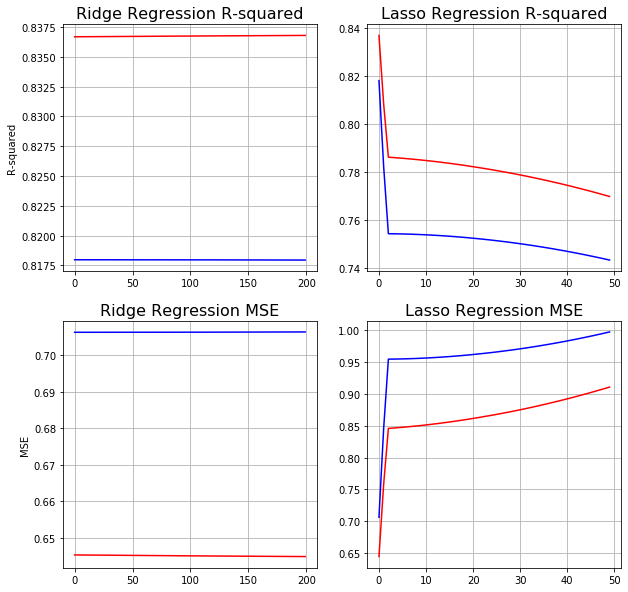

In [202]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0,0].plot(ridge_r_squared_train, 'b', ridge_r_squared_test, 'r')
axes[0,0].set_title("Ridge Regression R-squared", fontsize=16)
axes[0,0].set_ylabel("R-squared")

axes[0,1].plot(lasso_r_squared_train, 'b', lasso_r_squared_test, 'r')
axes[0,1].set_title("Lasso Regression R-squared", fontsize=16)

# training set and test set together
axes[1,0].plot(ridge_mse_train, 'b', ridge_mse_test, 'r')
axes[1,0].set_title("Ridge Regression MSE", fontsize=16)
axes[1,0].set_ylabel("MSE")

axes[1,1].plot(lasso_mse_train, 'b', lasso_mse_test, 'r')
axes[1,1].set_title("Lasso Regression MSE", fontsize=16)

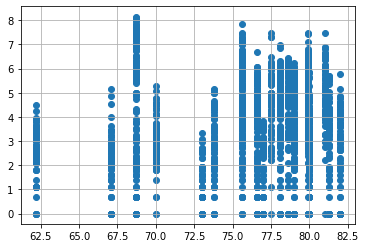

In [222]:
X=final_df['ANNUAL']
Y=final_df['New_cases_log']

plt.scatter(X,Y)

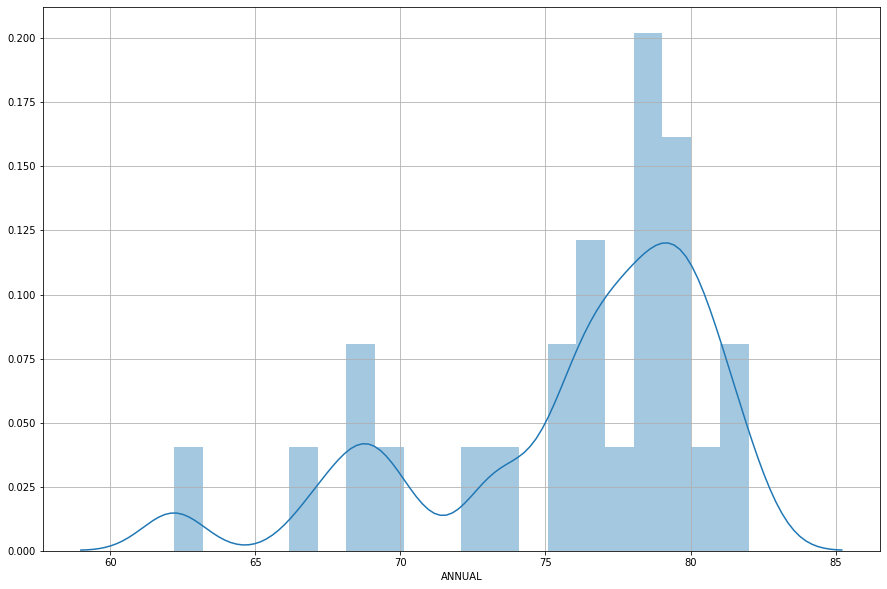

In [224]:
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(final_df['ANNUAL'])

In [218]:
final_df.columns.values

array(['State-Abbr', 'Municipality', 'MinDate', 'State_x', 'City_x',
       'IS_CAPITOL', 'ANNUAL', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', '# CITIES', 'Region_x',
       'State_y', 'Date', 'Week #', 'Population as of 2019',
       'Accumulated cases', 'New cases', 'DaysCount', 'New_cases_log',
       'CommonTwoLetterAbbreviation', 'State', 'CapitolCity', 'Region_y',
       'Size', 'Population2007', 'UrbanRural', 'Acc_cases_log', 'NDays',
       'NDays_2', 'NDays_3', 'City_y', 'Area(sq.km)', 'DensityPopulation',
       'DensityPopulation_2'], dtype=object)

In [239]:
tX =final_df['ANNUAL']
ty=final_df['New cases']

Xx=np.array(tX)
yy=np.array(ty)
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, random_state = 0)

from sklearn.linear_model import LinearRegression
xmodel = LinearRegression(fit_intercept=True)

xmodel.fit(Xx_train[:,np.newaxis],yy_train)
xlyfit=model.predict(Xx_train[:,np.newaxis])

pd.DataFrame({'estimate': xmodel.coef_})

,estimate
0,-3.018995


In the Paper provided, the data of the covid cases in the capital cities was between the date ranges Feb 27 to April 1, the ANNUAL temperatures range between 16.8 °C to 27.4 °C.
And in the data we have, the covid cases in the capital cities data starts from date Mar 28 the ANNUAL temperatures range between 16.77778 °C to 27.77 °C 